In [ ]:
import jax
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

from abmax.structs import *


import seaborn as sns
sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

In [2]:
def plot_mean_nn_dist(RENDER_DATA_PATH, figname):
    mean_nn_dist_e_0 = jnp.load(RENDER_DATA_PATH + '/e_0/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_20 = jnp.load(RENDER_DATA_PATH + '/e_20/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_50 = jnp.load(RENDER_DATA_PATH + '/e_50/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_100 = jnp.load(RENDER_DATA_PATH + '/e_100/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_200 = jnp.load(RENDER_DATA_PATH + '/e_200/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_500 = jnp.load(RENDER_DATA_PATH + '/e_500/rendering_forager_avg_NN_dists.npy')


    #take mean across 5 seeds
    mean_nn_dist_e_0 = jnp.mean(mean_nn_dist_e_0, axis=0)
    mean_nn_dist_e_20 = jnp.mean(mean_nn_dist_e_20, axis=0)
    mean_nn_dist_e_50 = jnp.mean(mean_nn_dist_e_50, axis=0)
    mean_nn_dist_e_100 = jnp.mean(mean_nn_dist_e_100, axis=0)
    mean_nn_dist_e_200 = jnp.mean(mean_nn_dist_e_200, axis=0)
    mean_nn_dist_e_500 = jnp.mean(mean_nn_dist_e_500, axis=0)



    mean_nn_dist_e_0_c = jnp.convolve(mean_nn_dist_e_0, jnp.ones(125)/125, mode='valid')
    mean_nn_dist_e_20_c = jnp.convolve(mean_nn_dist_e_20, jnp.ones(125)/125, mode='valid')
    mean_nn_dist_e_50_c = jnp.convolve(mean_nn_dist_e_50, jnp.ones(125)/125, mode='valid')
    mean_nn_dist_e_100_c = jnp.convolve(mean_nn_dist_e_100, jnp.ones(125)/125, mode='valid')
    mean_nn_dist_e_200_c = jnp.convolve(mean_nn_dist_e_200, jnp.ones(125)/125, mode='valid')
    mean_nn_dist_e_500_c = jnp.convolve(mean_nn_dist_e_500, jnp.ones(125)/125, mode='valid')

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlabel('Timestep', fontsize=15)
    ax.set_ylabel('Nearest neighbor distance', fontsize=15)
    #yticks every 5000 timesteps in 20K steps
    ax.set_xticks(jnp.arange(0, 25000, 5000))
    linestyles = ['-', '--', ':', '-.', (0,(3,1,1,1)), (0,(1,1,1,1))]  # 5 distinct styles

    ax.plot(mean_nn_dist_e_0_c, label='$\\bar{e}=0$', linestyle=linestyles[0])
    ax.plot(mean_nn_dist_e_20_c, label='$\\bar{e}=20$', linestyle=linestyles[1])
    ax.plot(mean_nn_dist_e_50_c, label='$\\bar{e}=50$', linestyle=linestyles[2])
    ax.plot(mean_nn_dist_e_100_c, label='$\\bar{e}=100$', linestyle=linestyles[3])
    ax.plot(mean_nn_dist_e_200_c, label='$\\bar{e}=200$', linestyle=linestyles[4])
    ax.plot(mean_nn_dist_e_500_c, label='$\\bar{e}=500$', linestyle=linestyles[5])

    ax.legend(loc='upper left', fontsize=15)
    plt.savefig(figname, bbox_inches='tight')
    plt.show()


In [3]:
def plot_final_nn_vs_energy(RENDER_DATA_PATH, figname):
    mean_nn_dist_e_0 = jnp.load(RENDER_DATA_PATH + '/e_0/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_10 = jnp.load(RENDER_DATA_PATH + '/e_10/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_20 = jnp.load(RENDER_DATA_PATH + '/e_20/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_30 = jnp.load(RENDER_DATA_PATH + '/e_30/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_40 = jnp.load(RENDER_DATA_PATH + '/e_40/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_50 = jnp.load(RENDER_DATA_PATH + '/e_50/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_100 = jnp.load(RENDER_DATA_PATH + '/e_100/rendering_forager_avg_NN_dists.npy')
    mean_nn_dist_e_200 = jnp.load(RENDER_DATA_PATH + '/e_200/rendering_forager_avg_NN_dists.npy')

    std_nn_dist_e_0 = jnp.std(mean_nn_dist_e_0, axis=0)
    std_nn_dist_e_10 = jnp.std(mean_nn_dist_e_10, axis=0)
    std_nn_dist_e_20 = jnp.std(mean_nn_dist_e_20, axis=0)
    std_nn_dist_e_30 = jnp.std(mean_nn_dist_e_30, axis=0)
    std_nn_dist_e_40 = jnp.std(mean_nn_dist_e_40, axis=0)
    std_nn_dist_e_50 = jnp.std(mean_nn_dist_e_50, axis=0)
    std_nn_dist_e_100 = jnp.std(mean_nn_dist_e_100, axis=0)
    std_nn_dist_e_200 = jnp.std(mean_nn_dist_e_200, axis=0)

    mean_nn_dist_e_0 = jnp.mean(mean_nn_dist_e_0, axis=0)
    mean_nn_dist_e_10 = jnp.mean(mean_nn_dist_e_10, axis=0)
    mean_nn_dist_e_20 = jnp.mean(mean_nn_dist_e_20, axis=0)
    mean_nn_dist_e_30 = jnp.mean(mean_nn_dist_e_30, axis=0)
    mean_nn_dist_e_40 = jnp.mean(mean_nn_dist_e_40, axis=0)
    mean_nn_dist_e_50 = jnp.mean(mean_nn_dist_e_50, axis=0)
    mean_nn_dist_e_100 = jnp.mean(mean_nn_dist_e_100, axis=0)
    mean_nn_dist_e_200 = jnp.mean(mean_nn_dist_e_200, axis=0)
    
    e_vals = np.array([0,10,20,30,40,50,100,200], dtype=float)
    final_nn_dists = [mean_nn_dist_e_0[-1], mean_nn_dist_e_10[-1], mean_nn_dist_e_20[-1], mean_nn_dist_e_30[-1], mean_nn_dist_e_40[-1], mean_nn_dist_e_50[-1], mean_nn_dist_e_100[-1], mean_nn_dist_e_200[-1]]
    
    final_nn_stds = [std_nn_dist_e_0[-1], std_nn_dist_e_10[-1], std_nn_dist_e_20[-1], std_nn_dist_e_30[-1], std_nn_dist_e_40[-1], std_nn_dist_e_50[-1], std_nn_dist_e_100[-1], std_nn_dist_e_200[-1]]

    y = np.array(final_nn_dists, dtype=float)
    yerr = np.array(final_nn_stds, dtype=float)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.errorbar(e_vals, y, yerr=yerr, fmt='o', capsize=5)
    ax.plot(e_vals, y, linestyle='--', color='gray', alpha=0.7)

    ax.set_xlabel('Amount of resource in foragers', fontsize=15)
    ax.set_ylabel('Nearest neighbor distance at $T$', fontsize=15)
    ax.set_xticks(e_vals)
    ax.set_xticklabels([str(int(v)) for v in e_vals])
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.savefig(figname, bbox_inches='tight')
    plt.show()

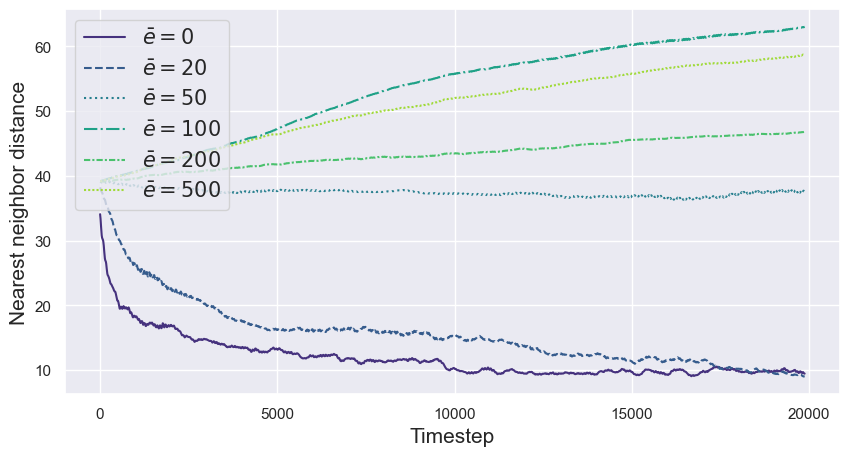

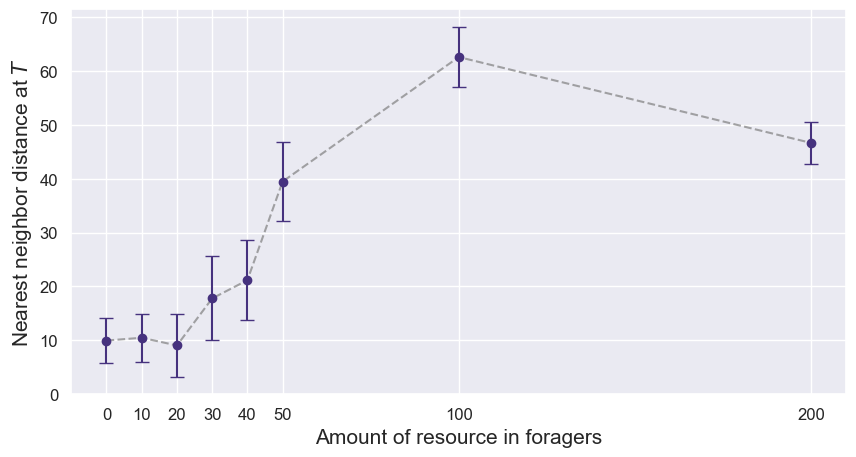

In [6]:
render_data_path = "./trajectories_s_7/"
figname1 = "./figs/mnn_progress_s_7.png"
figname2 = "./figs/final_nn_vs_energy_s_7.png"
plot_mean_nn_dist(render_data_path, figname1)
plot_final_nn_vs_energy(render_data_path, figname2)

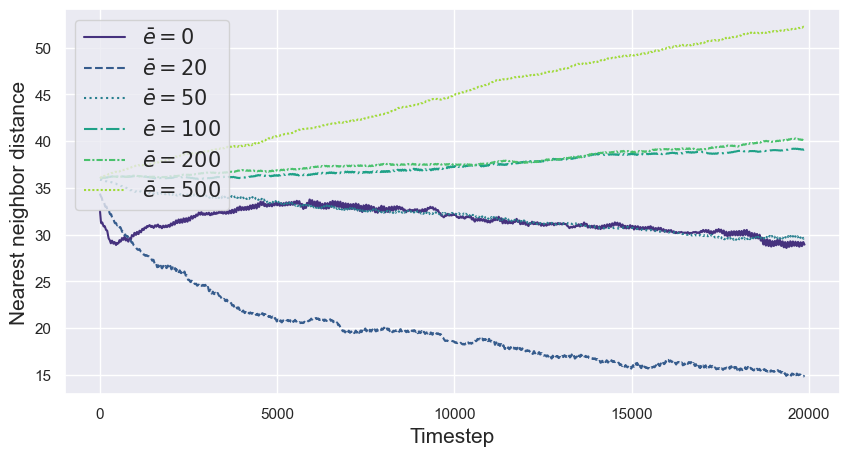

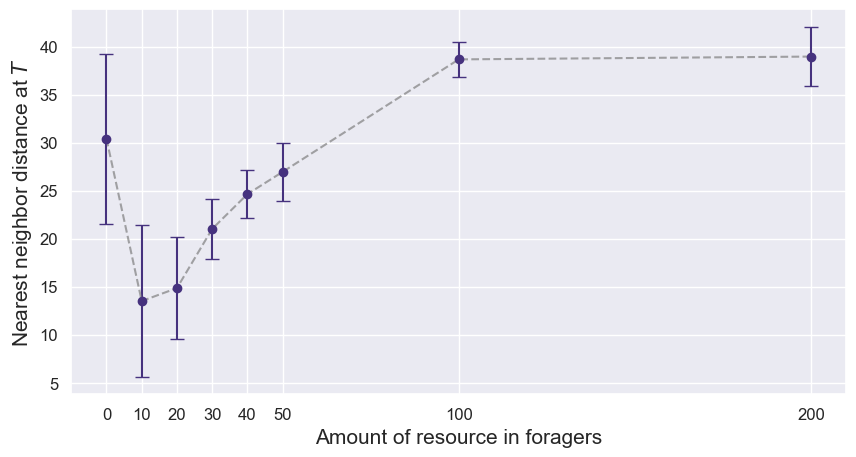

In [5]:
render_data_path = "./trajectories_s_5/"
figname1 = "./figs/mnn_progress_s_5.png"
figname2 = "./figs/final_nn_vs_energy_s_5.png"
plot_mean_nn_dist(render_data_path, figname1)
plot_final_nn_vs_energy(render_data_path, figname2)